In [1]:
import numpy as np

data = np.genfromtxt('data/ex1/ex1data1.txt', delimiter=',')
input_X = data[:, 0]
input_y = data[:, 1]

data[:10]

array([[  6.1101,  17.592 ],
       [  5.5277,   9.1302],
       [  8.5186,  13.662 ],
       [  7.0032,  11.854 ],
       [  5.8598,   6.8233],
       [  8.3829,  11.886 ],
       [  7.4764,   4.3483],
       [  8.5781,  12.    ],
       [  6.4862,   6.5987],
       [  5.0546,   3.8166]])

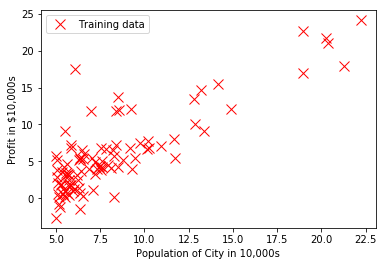

In [2]:
% matplotlib inline
import matplotlib.pyplot as plt

plt.plot(input_X, input_y, 'rx', markersize=10, label='Training data')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend()

In [3]:
import tensorflow as tf

X = tf.placeholder(tf.float32, name='X')
y = tf.placeholder(tf.float32, name='y')

weight = tf.Variable(0.0, dtype=tf.float32, name='weight')
bias = tf.Variable(0.0, dtype=tf.float32, name='bias')

In [4]:
with tf.name_scope('hypothesis'):
    h = weight * X + bias

with tf.name_scope('cost'):
    square_delta = tf.square(h - y)
    loss = tf.reduce_mean(square_delta) / 2

In [5]:
alpha = 0.01
optimizer = tf.train.GradientDescentOptimizer(alpha)
train = optimizer.minimize(loss)

In [6]:
sess = tf.Session()

init = tf.global_variables_initializer()
sess.run(init)

In [7]:
from utils import subdir

tf.summary.scalar('loss', loss)

merged = tf.summary.merge_all()
logdir = 'logs/ex1'
writer = tf.summary.FileWriter(subdir(logdir), sess.graph)

In [8]:
feed_dict = {X: input_X, y: input_y}
sess.run(loss, feed_dict=feed_dict)

32.072735

In [9]:
max_iterations = 1500
for i in range(max_iterations):
    if i % 10 == 0:
        summary, _ = sess.run([merged, loss], feed_dict=feed_dict)
        writer.add_summary(summary, i)
    sess.run(train, feed_dict=feed_dict)

In [10]:
sess.run(loss, feed_dict=feed_dict)

4.4833884

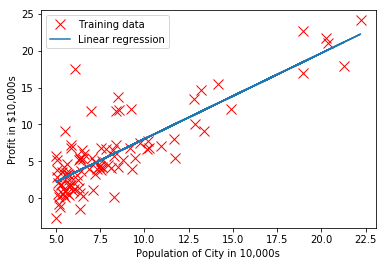

In [11]:
def predict(x):
    return sess.run(h, feed_dict={X: x})

plt.plot(input_X, input_y, 'rx', markersize=10, label='Training data')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(input_X, predict(input_X), '-', label='Linear regression')
plt.legend()

In [12]:
predict1 = predict(3.5) * 10000
print('For population = 35,000, we predict a profit of %f' % predict1)
predict2 = predict(7.0) * 10000
print('For population = 70,000, we predict a profit of %f' % predict2)

For population = 35,000, we predict a profit of 4519.758224
For population = 70,000, we predict a profit of 45342.440605
